In [47]:
#Preprocessing for neural network or other models - steps
#1 import dependencies 
#bring in data
#look for categorical fields that need to be made numeric
#Look at unique value counts for each field
#determine how to bin
#bin/bucket if needed
#create one_hot encoder instance
#fit the one_hot encoder
#use one hot encoder
#merge new fields back to original dataframe
#drop original fields that are now encoded

In [48]:
#Import dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from datetime import datetime
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#display options
pd.set_option ('display.max_rows', 10)


In [49]:
#Set path of input file
file_path = "C:/Users/berge/Capstone Project/Capstone-Project-main/resources/Cleaned_Salary_Data.csv"
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,Oracle,Product Manager,127000,1.5,1.5,107000.0,20000.0,10000.0,none,7392,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,eBay,Software Engineer,100000,5.0,3.0,0.0,0.0,0.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,Amazon,Product Manager,310000,8.0,0.0,155000.0,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,Apple,Software Engineering Manager,372000,7.0,5.0,157000.0,180000.0,35000.0,none,7472,...,0,0,0,0,0,0,0,Sunnyvale,CA,USA
4,Microsoft,Software Engineer,157000,5.0,3.0,0.0,0.0,0.0,none,7322,...,0,0,0,0,0,0,0,Mountain View,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62632,Google,Software Engineer,327000,10.0,1.0,155000.0,150000.0,22000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62633,Microsoft,Software Engineer,237000,2.0,2.0,146900.0,73200.0,16000.0,none,11521,...,0,0,0,0,0,0,0,Redmond,WA,USA
62634,MSFT,Software Engineer,220000,14.0,12.0,157000.0,25000.0,20000.0,none,11527,...,0,0,0,0,0,0,0,Seattle,WA,USA
62635,Salesforce,Software Engineer,280000,8.0,4.0,194688.0,57000.0,29000.0,none,7419,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [50]:
#inspect data to see which fields are strings that need to be converted to numeric
salaries_df.select_dtypes(include=['object']).columns


Index(['company', 'title', 'gender', 'city', 'state', 'country'], dtype='object')

In [51]:
#convert timestamp to datetime format
# salaries_df['timestamp']=pd.to_datetime(salaries_df['timestamp'])
#display options
#pd.set_option ('display.max_rows', 10)
#salaries_df


In [52]:
# Determine the number of unique values in each column.
pd.set_option ('display.max_rows', None)
salaries_df.nunique()
#Fields that need bucketing: company, title, city, state, country

company                     1631
title                         15
totalyearlycompensation      893
yearsofexperience             65
yearsatcompany                81
basesalary                   482
stockgrantvalue              610
bonus                        335
gender                         4
cityid                      1045
dmaid                        149
rowNumber                  62637
Masters_Degree                 2
Bachelors_Degree               2
Doctorate_Degree               2
Highschool                     2
Some_College                   2
Race_Asian                     2
Race_White                     2
Race_Two_Or_More               2
Race_Black                     2
Race_Hispanic                  2
city                         955
state                        200
country                       81
dtype: int64

In [53]:
#Check company field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the company value counts
company_counts = salaries_df.company.value_counts()
print(company_counts)

Amazon                                     8126
Microsoft                                  5216
Google                                     4330
Facebook                                   2990
Apple                                      2028
Oracle                                     1128
Salesforce                                 1056
Intel                                       949
Cisco                                       907
IBM                                         907
Uber                                        880
Capital One                                 778
LinkedIn                                    701
VMware                                      657
Qualcomm                                    565
JPMorgan Chase                              541
Bloomberg                                   537
Goldman Sachs                               469
Intuit                                      449
PayPal                                      426
Deloitte                                

<AxesSubplot:ylabel='Density'>

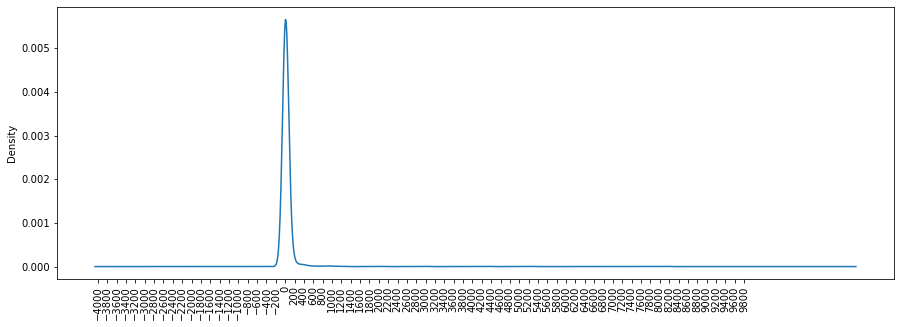

In [54]:
#Visualize the company value counts with a density plot
x_ticks = np.arange(-4000,10000,200)
company_counts.plot.density(xticks=x_ticks, figsize = (15,5), rot = 90)

In [55]:
#Density seems to drop off between 100 and 200 maybe, hard to see
#But this would produce too many buckets
#So bucket all <850 as other

#Determine which values to replace
replace_companies = list(company_counts[company_counts<850].index)

#Replace in DataFrame
for company in replace_companies:
    salaries_df.company = salaries_df.company.replace(company, "Other")

#Check to make sure binning was successful
salaries_df.company.value_counts()

Other         34120
Amazon         8126
Microsoft      5216
Google         4330
Facebook       2990
Apple          2028
Oracle         1128
Salesforce     1056
Intel           949
Cisco           907
IBM             907
Uber            880
Name: company, dtype: int64

In [56]:
#Check title field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the company value counts
title_counts = salaries_df.title.value_counts()
print(title_counts)

Software Engineer               41227
Product Manager                  4673
Software Engineering Manager     3568
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64


<AxesSubplot:ylabel='Density'>

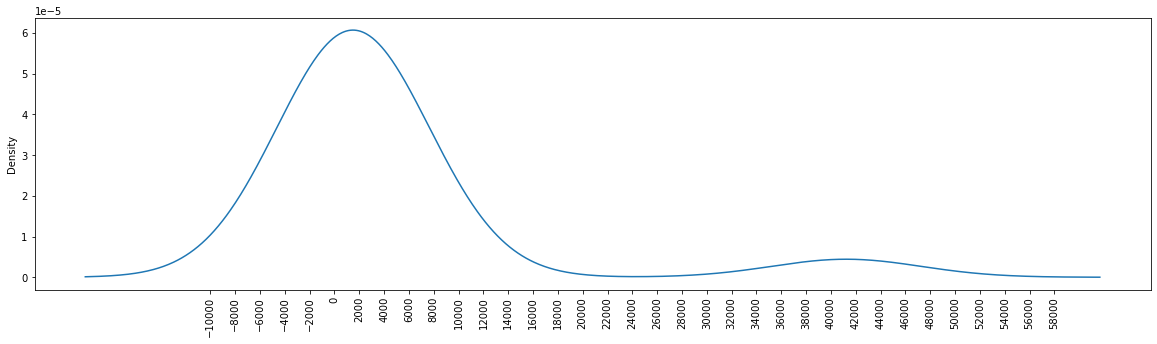

In [57]:
#Visualize the title value counts with a density plot
x_ticks = np.arange(-10000,60000,2000)
title_counts.plot.density(xticks=x_ticks, figsize = (20,5),rot = 90)

In [58]:
#values begine to fall off between 2000 and 4000. Bucket all under 2000

#Determine which values to replace
replace_title = list(title_counts[title_counts<2000].index)

#Replace in DataFrame
for title in replace_title:
    salaries_df.title = salaries_df.title.replace(title, "Other")

#Check to make sure binning was successful
salaries_df.title.value_counts()

Software Engineer               41227
Other                            8391
Product Manager                  4673
Software Engineering Manager     3568
Data Scientist                   2578
Hardware Engineer                2200
Name: title, dtype: int64

In [59]:
#Check city field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the city value counts
city_counts = salaries_df.city.value_counts()
print(city_counts)

Seattle                      8701
San Francisco                6797
New York                     4562
Redmond                      2650
Mountain View                2277
Sunnyvale                    2249
San Jose                     2052
Austin                       1526
Menlo Park                   1440
Cupertino                    1431
Bangalore                    1199
Santa Clara                  1196
Boston                       1192
Palo Alto                    1146
London                       1029
San Diego                     841
Chicago                       806
Toronto                       745
Bellevue                      739
Los Angeles                   714
Vancouver                     598
Washington                    594
Atlanta                       533
Hyderabad                     530
Bengaluru                     525
Dallas                        478
Redwood City                  459
Singapore                     357
Portland                      350
Berlin        

In [60]:
#Check state field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the city value counts
state_counts = salaries_df.state.value_counts()
print(state_counts)

CA           22824
WA           12356
NY            4715
TX            2701
MA            1755
KA            1724
EN            1139
ON            1010
IL             942
VA             917
OR             637
BC             606
DC             598
CO             590
GA             573
NC             504
PA             481
NJ             460
TS             406
AZ             379
SG             372
BE             343
FL             298
TP             295
DN             281
MN             278
NH             276
MI             228
UT             226
TA             210
MH             207
OH             202
NS             200
MO             192
MC             191
ZH             181
TN             177
WI             161
CT             158
MD             153
QC             132
AP             125
HR             124
BY             116
IN             100
AR              96
TY              95
UP              88
SC              77
SP              77
HA              67
DE              59
ST          

<AxesSubplot:ylabel='Density'>

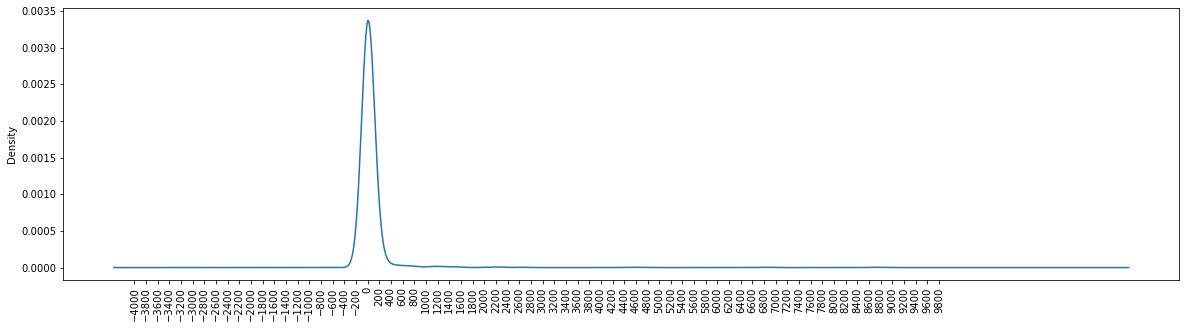

In [61]:
#Visualize the city value counts with a density plot
x_ticks = np.arange(-4000,10000,200)
city_counts.plot.density(xticks=x_ticks, figsize = (20,5), rot = 90)

In [62]:
#I think we should use regional bucketing for our first pass. The 3 location fields just have so many values that north
#doing anything else results in uneven buckets or way too many buckets
#US census bureau defines 9 divisions, which is a good number of buckets
#see this url: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
#create regional arrays

salaries_df['region'] = ''

#Create a function to define a region value for each row
def define_region(state):
    new_england = ['ME','CT','NH','VT','RI','MA']
    mid_atlantic = ['NJ','NY','PA']
    east_north_central =['IN','IL','MI','OH','WI']
    west_north_central = ['IA','KS','MN','MO','NE','ND','SD']
    south_atlantic = ['DE','DC','FL','GA','MD','NC','SC','VA','WV']
    east_south_central = ['AL','KY','MS','TN']
    west_south_central = ['AR','LA','OK','TX']
    mountain = ['AZ','CO','ID','NM','MT','UT','NV','WY']
    pacific = ['AK','CA','HI','OR','WA']
    region = ''
    if state in new_england:
        region = 1
    elif state in mid_atlantic:
        region = 2
    elif state in east_north_central:
        region = 3
    elif state in west_north_central:
        region = 4
    elif state in south_atlantic:
        region = 5
    elif state in east_south_central:
        region = 6
    elif state in west_south_central:
        region = 7
    elif state in mountain:
        region = 8
    elif state in pacific:
        region = 9
    else:
        region = 100
        
    return region
    

salaries_df['region'] = salaries_df['state'].apply(define_region)
salaries_df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,region
0,Oracle,Product Manager,127000,1.5,1.5,107000.0,20000.0,10000.0,none,7392,...,0,0,0,0,0,0,Redwood City,CA,USA,9
1,Other,Software Engineer,100000,5.0,3.0,0.0,0.0,0.0,none,7419,...,0,0,0,0,0,0,San Francisco,CA,USA,9
2,Amazon,Product Manager,310000,8.0,0.0,155000.0,0.0,0.0,none,11527,...,0,0,0,0,0,0,Seattle,WA,USA,9
3,Apple,Software Engineering Manager,372000,7.0,5.0,157000.0,180000.0,35000.0,none,7472,...,0,0,0,0,0,0,Sunnyvale,CA,USA,9
4,Microsoft,Software Engineer,157000,5.0,3.0,0.0,0.0,0.0,none,7322,...,0,0,0,0,0,0,Mountain View,CA,USA,9


In [63]:
salaries_df['region'].value_counts()
#no one went into category 100, so all the rows had valid state values

9      35821
100     9167
2       5656
5       3190
7       2865
1       2224
3       1633
8       1282
4        569
6        230
Name: region, dtype: int64

In [64]:
#Drop extra location columns prior to one_hot encoding
salaries_df = salaries_df.drop(columns=['city','state','country'])
pd.set_option ('display.max_rows', 10)
salaries_df

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,region
0,Oracle,Product Manager,127000,1.5,1.5,107000.0,20000.0,10000.0,none,7392,...,0,0,0,0,0,0,0,0,0,9
1,Other,Software Engineer,100000,5.0,3.0,0.0,0.0,0.0,none,7419,...,0,0,0,0,0,0,0,0,0,9
2,Amazon,Product Manager,310000,8.0,0.0,155000.0,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,0,0,9
3,Apple,Software Engineering Manager,372000,7.0,5.0,157000.0,180000.0,35000.0,none,7472,...,0,0,0,0,0,0,0,0,0,9
4,Microsoft,Software Engineer,157000,5.0,3.0,0.0,0.0,0.0,none,7322,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62632,Google,Software Engineer,327000,10.0,1.0,155000.0,150000.0,22000.0,none,11527,...,0,0,0,0,0,0,0,0,0,9
62633,Microsoft,Software Engineer,237000,2.0,2.0,146900.0,73200.0,16000.0,none,11521,...,0,0,0,0,0,0,0,0,0,9
62634,Other,Software Engineer,220000,14.0,12.0,157000.0,25000.0,20000.0,none,11527,...,0,0,0,0,0,0,0,0,0,9
62635,Salesforce,Software Engineer,280000,8.0,4.0,194688.0,57000.0,29000.0,none,7419,...,0,0,0,0,0,0,0,0,0,9


In [65]:
salaries_df['basesalary'].describe().apply(lambda x: format(x, '.2f'))

count      62637.00
mean      136689.43
std        61367.70
min            0.00
25%       108000.00
50%       140000.00
75%       170000.00
max      1659870.00
Name: basesalary, dtype: object

In [66]:
#create a target value from the base salary by bucketing
#Mean plus two standard deviations would be 149172 + 44382 + 44382 = 237936
#Make salary bands of 25000 
#Create a function to calculate salary level and apply to column
def salary_buckets(salary):
    max_level_threshold = 350000
    band_size = 25000
    max_bucket = int(max_level_threshold/band_size)
    if salary < max_level_threshold:
        salary_level = int(salary / band_size)
    else:
        salary_level = max_bucket
    return salary_level

In [67]:
salaries_df['salary_level'] = salaries_df['basesalary'].apply(salary_buckets)
salaries_df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,region,salary_level
0,Oracle,Product Manager,127000,1.5,1.5,107000.0,20000.0,10000.0,none,7392,...,0,0,0,0,0,0,0,0,9,4
1,Other,Software Engineer,100000,5.0,3.0,0.0,0.0,0.0,none,7419,...,0,0,0,0,0,0,0,0,9,0
2,Amazon,Product Manager,310000,8.0,0.0,155000.0,0.0,0.0,none,11527,...,0,0,0,0,0,0,0,0,9,6
3,Apple,Software Engineering Manager,372000,7.0,5.0,157000.0,180000.0,35000.0,none,7472,...,0,0,0,0,0,0,0,0,9,6
4,Microsoft,Software Engineer,157000,5.0,3.0,0.0,0.0,0.0,none,7322,...,0,0,0,0,0,0,0,0,9,0


In [68]:
pd.set_option ('display.max_rows', 20)
print(salaries_df['salary_level'].value_counts())

5     12825
6     12752
4     10291
7      6781
3      5203
8      4009
0      3223
2      2460
1      2015
9      1497
10      794
14      315
11      258
12      163
13       51
Name: salary_level, dtype: int64


In [69]:

salaries_df['salary_level'].value_counts()

5     12825
6     12752
4     10291
7      6781
3      5203
8      4009
0      3223
2      2460
1      2015
9      1497
10      794
14      315
11      258
12      163
13       51
Name: salary_level, dtype: int64

array([[<AxesSubplot:title={'center':'salary_level'}>]], dtype=object)

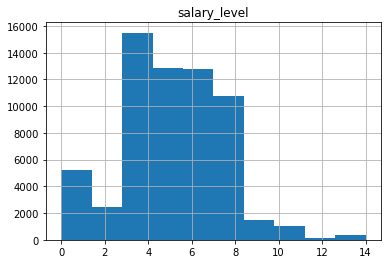

In [70]:
#Look at the distribution of salary level
salaries_df.hist(column = ["salary_level"])

In [71]:
# Generate our categorical variable lists
salaries_cat = salaries_df.dtypes[salaries_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
salaries_df[salaries_cat].nunique()

company    12
title       6
gender      4
dtype: int64

In [72]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(salaries_df[salaries_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(salaries_cat)
encode_df.head()

,company_Amazon,company_Apple,company_Cisco,company_Facebook,company_Google,company_IBM,company_Intel,company_Microsoft,company_Oracle,company_Other,...,title_Data Scientist,title_Hardware Engineer,title_Other,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,gender_Female,gender_Male,gender_Other,gender_none
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [73]:
# Merge one-hot encoded features and drop the originals
salaries_df = salaries_df.merge(encode_df,left_index=True, right_index=True)
salaries_df = salaries_df.drop(salaries_cat,1)
salaries_df.head()

C:\Users\berge\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,...,title_Data Scientist,title_Hardware Engineer,title_Other,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,gender_Female,gender_Male,gender_Other,gender_none
0,127000,1.5,1.5,107000.0,20000.0,10000.0,7392,807.0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100000,5.0,3.0,0.0,0.0,0.0,7419,807.0,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,310000,8.0,0.0,155000.0,0.0,0.0,11527,819.0,3,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,372000,7.0,5.0,157000.0,180000.0,35000.0,7472,807.0,7,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,157000,5.0,3.0,0.0,0.0,0.0,7322,807.0,9,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [74]:
# Remove annual and base salaries from features data
y = salaries_df.salary_level
X = salaries_df.drop(columns=["totalyearlycompensation","basesalary"])


In [75]:
print(y.value_counts())

5     12825
6     12752
4     10291
7      6781
3      5203
8      4009
0      3223
2      2460
1      2015
9      1497
10      794
14      315
11      258
12      163
13       51
Name: salary_level, dtype: int64


In [99]:
salaries_df

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,...,title_Data Scientist,title_Hardware Engineer,title_Other,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,gender_Female,gender_Male,gender_Other,gender_none
0,127000,1.5,1.5,107000.0,20000.0,10000.0,7392,807.0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100000,5.0,3.0,0.0,0.0,0.0,7419,807.0,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,310000,8.0,0.0,155000.0,0.0,0.0,11527,819.0,3,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,372000,7.0,5.0,157000.0,180000.0,35000.0,7472,807.0,7,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,157000,5.0,3.0,0.0,0.0,0.0,7322,807.0,9,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62632,327000,10.0,1.0,155000.0,150000.0,22000.0,11527,819.0,1973,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
62633,237000,2.0,2.0,146900.0,73200.0,16000.0,11521,819.0,2037,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
62634,220000,14.0,12.0,157000.0,25000.0,20000.0,11527,819.0,2044,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
62635,280000,8.0,4.0,194688.0,57000.0,29000.0,7419,807.0,2097,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [76]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [89]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(46977, 41)
(15660, 41)
(46977,)
(15660,)


In [77]:
from sklearn.metrics import accuracy_score
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.984


In [87]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[ 799    5    0    0    2    0    0    0    0    0    0    0    0    0
     0]
 [   0  492    8    3    1    0    0    0    0    0    0    0    0    0
     0]
 [   0    0  592   19    4    0    0    0    0    0    0    0    0    0
     0]
 [   1    0    0 1286   14    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    1 2572    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0 3206    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0 3188    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    1    2 1692    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    1    5    1  994    0    0    0    0    0
     1]
 [   0    0    0    0    0    0    1    6   26  338    3    0    0    0
     0]
 [   0    0    0    0    0    0    2    4   24    9  160    0    0    0
     0]
 [   0    0    0    0    0    1    0    3    6    6   24   24    0    0
     0]
 [   0    0    0    0    0    0    1    

In [88]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       806
           1       0.99      0.98      0.98       504
           2       0.99      0.96      0.97       615
           3       0.98      0.99      0.99      1301
           4       0.99      1.00      1.00      2573
           5       1.00      1.00      1.00      3206
           6       1.00      1.00      1.00      3188
           7       0.99      1.00      0.99      1695
           8       0.93      0.99      0.96      1002
           9       0.93      0.90      0.92       374
          10       0.78      0.80      0.79       199
          11       0.80      0.38      0.51        64
          12       0.61      0.27      0.37        41
          13       1.00      0.08      0.14        13
          14       0.93      0.66      0.77        79

    accuracy                           0.98     15660
   macro avg       0.93      0.80      0.83     15660
weighted avg       0.98   

In [85]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([4.78909750e-02, 2.21581196e-02, 6.43207799e-02, 6.64049687e-02,
       3.64457962e-02, 2.85881177e-02, 4.47972680e-02, 5.17984927e-03,
       4.41639309e-03, 2.02212723e-03, 5.18980303e-04, 4.87746773e-04,
       4.26886318e-03, 3.95955435e-03, 9.50331520e-04, 7.78226269e-04,
       1.16833312e-03, 1.88791172e-02, 5.85030279e-01, 6.52504492e-03,
       1.21909593e-03, 8.36914989e-04, 2.92372912e-03, 2.58400866e-03,
       1.14770526e-03, 9.04117689e-04, 2.51693652e-03, 1.25233527e-03,
       6.05347506e-03, 1.65907941e-03, 7.36544863e-04, 1.96558382e-03,
       1.42491966e-03, 4.72362147e-03, 2.75742768e-03, 5.56064126e-03,
       3.54561639e-03, 3.12121490e-03, 5.07604688e-03, 6.10146627e-04,
       4.58996684e-03])

In [83]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
1469/1469 [==============================] - 2s 994us/step - loss: -53.8044 - accuracy: 0.0322
Epoch 2/50
1469/1469 [==============================] - 1s 997us/step - loss: -133.3227 - accuracy: 0.0322
Epoch 3/50
1469/1469 [==============================] - 1s 998us/step - loss: -212.7920 - accuracy: 0.0715
Epoch 4/50
1469/1469 [==============================] - 1s 1ms/step - loss: -291.0319 - accuracy: 0.0818
Epoch 5/50
1469/1469 [==============================] - 1s 1ms/step - loss: -368.7730 - accuracy: 0.0825
Epoch 6/50
1469/1469 [==============================] - 1s 993us/step - loss: -446.4084 - accuracy: 0.0827
Epoch 7/50
1469/1469 [==============================] - 1s 1ms/step - loss: -524.0428 - accuracy: 0.0831
Epoch 8/50
1469/1469 [==============================] - 1s 1ms/step - loss: -601.6800 - accuracy: 0.0831
Epoch 9/50
1469/1469 [==============================] - 2s 1ms/step - loss: -679.3174 - accuracy: 0.0833
Epoch 10/50
1469/1469 [=========================

In [96]:
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 24)                1008      
                                                                 
 dense_6 (Dense)             (None, 12)                300       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________
